In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import root_numpy as rn

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [162]:
f = rn.root2array('erl_ccpi0.root',treename='shower_tree')

df = pd.DataFrame(f)
df.head()

,_event,_shower_e,_shower_rl
0,1,85.241798,0.309062
1,5,98.411850,33.743385
2,6,119.307549,16.923897
3,7,167.389297,1.657025
4,9,90.620575,28.497272


In [164]:
#df1 = df.replace([np.inf, -np.inf], np.nan).dropna(how="any")

df1 = df.query('_shower_e > 0')
print df1.shape[0], df.shape[0]

print float(df.query('_shower_e > 50').shape[0]) / df.shape[0]
print float(df.query('_shower_rl > 3').shape[0]) / df.shape[0]
print float(df.query('_shower_rl < 60 & _shower_rl > 3 & _shower_e > 50').shape[0]) / df.shape[0]
print float(df.query('_shower_rl < 60 & _shower_rl > 3 & _shower_e > 50').shape[0]) / df.shape[0]

1724 1727
0.924724956572
0.844817602779
0.731325998842
0.731325998842


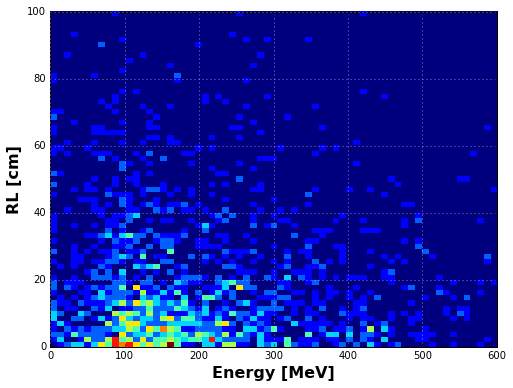

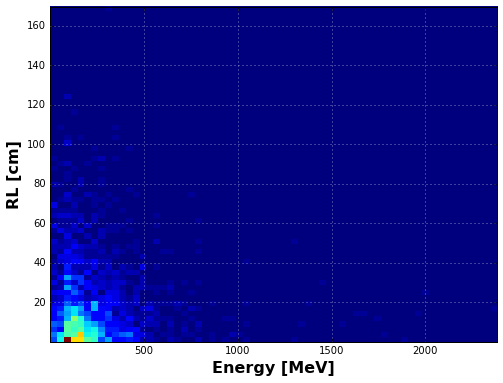

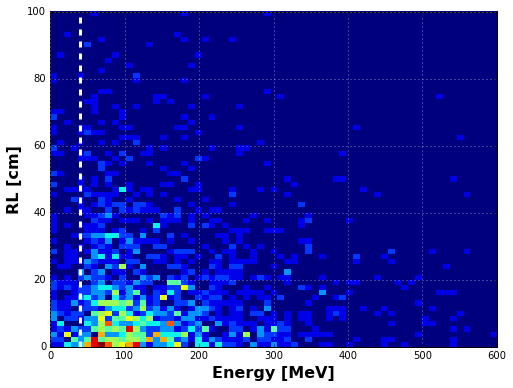

In [167]:
plt.figure(figsize=(8,6))
_ = plt.hist2d(df1._shower_e.values,df1._shower_rl.values,bins=65,range=([0,600],[0,100]))
plt.xlabel('Energy [MeV]',fontsize=16,weight='bold')
plt.ylabel('RL [cm]',fontsize=16,weight='bold')
plt.grid(True,color='w')

plt.figure(figsize=(8,6))
_ = plt.hist2d(df1._shower_e.values,df1._shower_rl.values,bins=65)#,range=([0,600],[0,100]))
plt.xlabel('Energy [MeV]',fontsize=16,weight='bold')
plt.ylabel('RL [cm]',fontsize=16,weight='bold')
plt.grid(True,color='w')

# Correct for missed energy (~70%)

plt.figure(figsize=(8,6))
_ = plt.hist2d(df1._shower_e.values*0.7,df1._shower_rl.values,bins=65,range=([0,600],[0,100]))
plt.xlabel('Energy [MeV]',fontsize=16,weight='bold')
plt.ylabel('RL [cm]',fontsize=16,weight='bold')
plt.grid(True,color='w')
#plt.colorbar()
plt.axvline(40,color='w',linestyle='--',lw=3)

In [2]:
# cosmic + bnb full
f = rn.root2array('erl_mcc8_0.root',treename='shower_tree')

df = pd.DataFrame(f)

df_bkgd = df.query('signal == False')
df_sig  = df.query('signal == True')

s = df_sig['event'].nunique() #df_sig.groupby('_event')
b = df_bkgd['event'].nunique() #df_sig.groupby('_event')

print "Tot, sig, bkgd: ", df.shape[0], df_sig.shape[0], df_bkgd.shape[0]
print "Unique signal and backgrd: ", s, b


Tot, sig, bkgd:  1192 546 646
Unique signal and backgrd:  444 582


(0, 65)

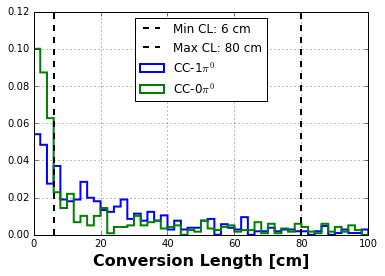

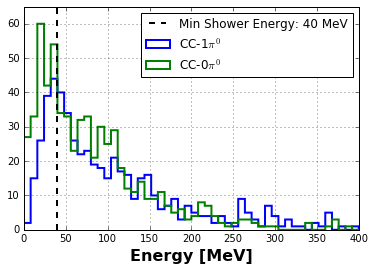

In [7]:
n = 50; norm = True
xlim = 100

plt.figure(figsize=(6,4))
_,_,_ = plt.hist(df_sig.shower_rl.values,bins=n,normed=norm,range=(0,xlim),histtype='step',lw=2,label='CC-1$\pi^0$')
_,_,_ = plt.hist(df_bkgd.shower_rl.values,bins=n,normed=norm,range=(0,xlim),histtype='step',lw=2,label='CC-0$\pi^0$')
plt.xlabel('Conversion Length [cm]',fontsize=16,weight='bold')
plt.grid(True)
plt.axvline(6, color='k',label='Min CL: %i cm' % 6,ls='--',lw=2)
plt.axvline(80, color='k',label='Max CL: %i cm' % 80,ls='--',lw=2)
plt.legend(loc=0) #'upper left',bbox_to_anchor=(1,0.7)) #loc=10)
#plt.ylim(0,0.055)

xlim = 400; norm =False
plt.figure(figsize=(6,4))
_,_,_ = plt.hist(df_sig.shower_e.values,bins=n,normed=norm,range=(0,xlim),histtype='step',lw=2,label='CC-1$\pi^0$')
_,_,_ = plt.hist(df_bkgd.shower_e.values,bins=n,normed=norm,range=(0,xlim),histtype='step',lw=2,label='CC-0$\pi^0$')
plt.xlabel('Energy [MeV]',fontsize=16,weight='bold')
plt.grid(True)
plt.axvline(40, color='k',label='Min Shower Energy: %i MeV' % 40,ls='--',lw=2)
plt.legend(loc=0)
plt.ylim(0,65)

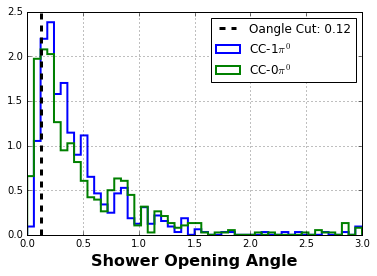

In [4]:
n = 50; norm = True
xlim = 3.

plt.figure(figsize=(6,4))
_,_,_ = plt.hist(df_sig.shower_oangle.values,bins=n,normed=norm,range=(0,xlim),histtype='step',lw=2,label='CC-1$\pi^0$')
_,_,_ = plt.hist(df_bkgd.shower_oangle.values,bins=n,normed=norm,range=(0,xlim),histtype='step',lw=2,label='CC-0$\pi^0$')
plt.xlabel('Shower Opening Angle',fontsize=16,weight='bold')
plt.grid(True)
plt.axvline(0.12,color='k',linestyle='--',lw=3,label='Oangle Cut: 0.12')
plt.legend(loc=0)
#plt.ylim(0,50)


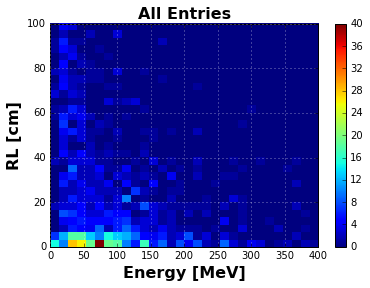

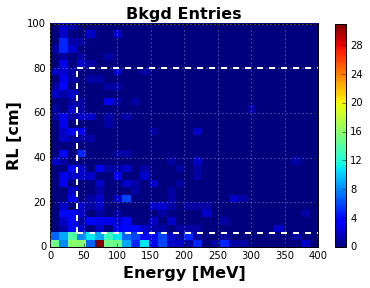

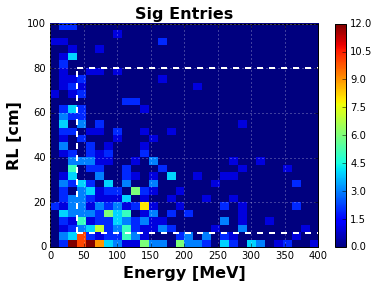

In [313]:
n = 30
rlim = 100 #200
elim = 400

plt.figure(figsize=(6,4))
_ = plt.hist2d(df.shower_e.values,df.shower_rl.values,bins=n,range=([0,elim],[0,rlim]))
plt.xlabel('Energy [MeV]',fontsize=16,weight='bold')
plt.ylabel('RL [cm]',fontsize=16,weight='bold')
plt.title('All Entries',fontsize=16,weight='bold')
plt.grid(True,color='w')
plt.colorbar()

plt.figure(figsize=(6,4))
_ = plt.hist2d(df_bkgd.shower_e.values,df_bkgd.shower_rl.values,bins=n,range=([0,elim],[0,rlim]))
plt.xlabel('Energy [MeV]',fontsize=16,weight='bold')
plt.ylabel('RL [cm]',fontsize=16,weight='bold')
plt.title('Bkgd Entries',fontsize=16,weight='bold')
plt.grid(True,color='w')
#plt.axvline(40,color='w',linestyle='--',lw=2)
#plt.axhline(6,color='w',linestyle='--',lw=2)
#plt.axhline(80,color='w',linestyle='--',lw=2)
plt.plot((40,400),(6,6),'w--',lw=2)
plt.plot((40,400),(80,80),'w--',lw=2)
plt.plot((40,40),(6,80),'w--',lw=2)
plt.colorbar()

plt.figure(figsize=(6,4))
_ = plt.hist2d(df_sig.shower_e.values,df_sig.shower_rl.values,bins=n,range=([0,elim],[0,rlim]))
plt.xlabel('Energy [MeV]',fontsize=16,weight='bold')
plt.ylabel('RL [cm]',fontsize=16,weight='bold')
plt.grid(True,color='w')
plt.title('Sig Entries',fontsize=16,weight='bold')
plt.plot((40,400),(6,6),'w--',lw=2)
plt.plot((40,400),(80,80),'w--',lw=2)
plt.plot((40,40),(6,80),'w--',lw=2)
plt.colorbar()


In [316]:
# cosmic + bnb full with HR improvements
f = rn.root2array('erl.root',treename='shower_tree')

df = pd.DataFrame(f)

df_bkgd = df.query('signal == False')
df_sig  = df.query('signal == True')

s = df_sig['event'].nunique() #df_sig.groupby('_event')
b = df_bkgd['event'].nunique() #df_sig.groupby('_event')

print "Tot, sig, bkgd: ", df.shape[0], df_sig.shape[0], df_bkgd.shape[0]
print "Unique signal and backgrd: ", s, b


Tot, sig, bkgd:  825 499 326
Unique signal and backgrd:  418 292


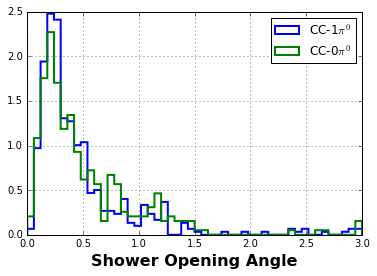

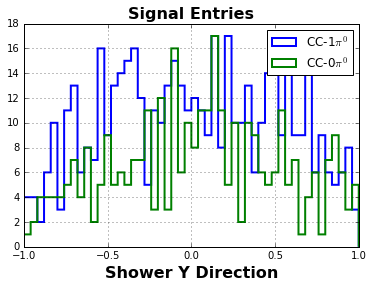

In [317]:
n = 50; norm = True
xlim = 3.

plt.figure(figsize=(6,4))
_,_,_ = plt.hist(df_sig.shower_oangle.values,bins=n,normed=norm,range=(0,xlim),histtype='step',lw=2,label='CC-1$\pi^0$')
_,_,_ = plt.hist(df_bkgd.shower_oangle.values,bins=n,normed=norm,range=(0,xlim),histtype='step',lw=2,label='CC-0$\pi^0$')
plt.xlabel('Shower Opening Angle',fontsize=16,weight='bold')
plt.grid(True)
#plt.axvline(0.1,color='k',linestyle='--',lw=3,label='Oangle Cut')
plt.legend(loc=0)
#plt.ylim(0,50)


xlim = 1
plt.figure(figsize=(6,4))
_,_,_ = plt.hist(df_sig.shower_angle.values,bins=n,range=(-1,xlim),histtype='step',lw=2,label='CC-1$\pi^0$')
_,_,_ = plt.hist(df_bkgd.shower_angle.values,bins=n,range=(-1,xlim),histtype='step',lw=2,label='CC-0$\pi^0$')
plt.xlabel('Shower Y Direction',fontsize=16,weight='bold')
plt.title('Signal Entries',fontsize=16,weight='bold')
plt.legend(loc=0)
plt.grid(True)

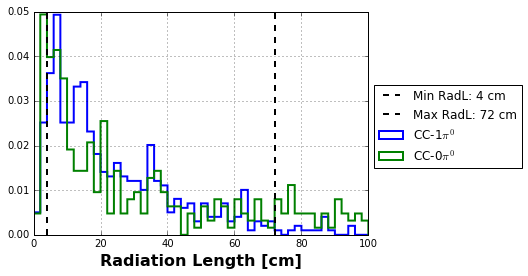

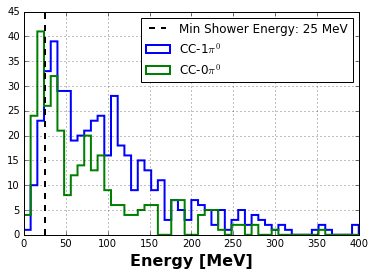

In [318]:
n = 50; norm = True
xlim = 100

plt.figure(figsize=(6,4))
_,_,_ = plt.hist(df_sig.shower_rl.values,bins=n,normed=norm,range=(0,xlim),histtype='step',lw=2,label='CC-1$\pi^0$')
_,_,_ = plt.hist(df_bkgd.shower_rl.values,bins=n,normed=norm,range=(0,xlim),histtype='step',lw=2,label='CC-0$\pi^0$')
plt.xlabel('Radiation Length [cm]',fontsize=16,weight='bold')
plt.grid(True)
plt.axvline(4, color='k',label='Min RadL: %i cm' % 4,ls='--',lw=2)
plt.axvline(72, color='k',label='Max RadL: %i cm' % 72,ls='--',lw=2)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.7)) #loc=10)
#plt.ylim(0,0.055)

xlim = 400; norm =False
plt.figure(figsize=(6,4))
_,_,_ = plt.hist(df_sig.shower_e.values,bins=n,normed=norm,range=(0,xlim),histtype='step',lw=2,label='CC-1$\pi^0$')
_,_,_ = plt.hist(df_bkgd.shower_e.values,bins=n,normed=norm,range=(0,xlim),histtype='step',lw=2,label='CC-0$\pi^0$')
plt.xlabel('Energy [MeV]',fontsize=16,weight='bold')
plt.grid(True)
plt.axvline(25, color='k',label='Min Shower Energy: %i MeV' % 25,ls='--',lw=2)
plt.legend(loc=0)

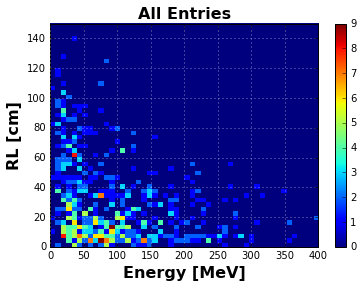

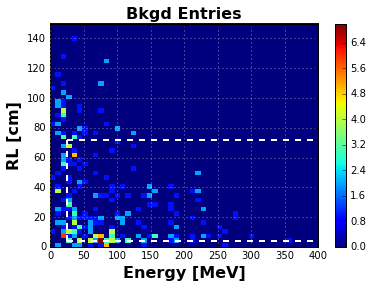

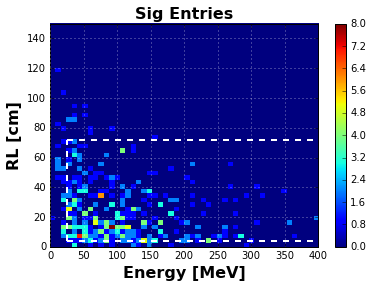

In [321]:
n = 50
rlim = 150 #200
elim = 400

plt.figure(figsize=(6,4))
_ = plt.hist2d(df.shower_e.values,df.shower_rl.values,bins=n,range=([0,elim],[0,rlim]))
plt.xlabel('Energy [MeV]',fontsize=16,weight='bold')
plt.ylabel('RL [cm]',fontsize=16,weight='bold')
plt.title('All Entries',fontsize=16,weight='bold')
plt.grid(True,color='w')
plt.colorbar()


plt.figure(figsize=(6,4))
_ = plt.hist2d(df_bkgd.shower_e.values,df_bkgd.shower_rl.values,bins=n,range=([0,elim],[0,rlim]))
plt.xlabel('Energy [MeV]',fontsize=16,weight='bold')
plt.ylabel('RL [cm]',fontsize=16,weight='bold')
plt.title('Bkgd Entries',fontsize=16,weight='bold')
plt.grid(True,color='w')
plt.colorbar()
plt.plot((25,400),(4,4),'w--',lw=2)
plt.plot((25,400),(72,72),'w--',lw=2)
plt.plot((25,25),(4,72),'w--',lw=2)

plt.figure(figsize=(6,4))
_ = plt.hist2d(df_sig.shower_e.values,df_sig.shower_rl.values,bins=n,range=([0,elim],[0,rlim]))
plt.xlabel('Energy [MeV]',fontsize=16,weight='bold')
plt.ylabel('RL [cm]',fontsize=16,weight='bold')
plt.grid(True,color='w')
plt.title('Sig Entries',fontsize=16,weight='bold')
plt.plot((25,400),(4,4),'w--',lw=2)
plt.plot((25,400),(72,72),'w--',lw=2)
plt.plot((25,25),(4,72),'w--',lw=2)
plt.colorbar()
